In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
df = pd.read_csv("retail_sales_dataset.csv")

In [10]:
df.head(10)


,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,"Friday, November 24, 2023",CUST001,Male,34,Beauty,3,50,150
1,2,"Monday, February 27, 2023",CUST002,Female,26,Clothing,2,500,1000
2,3,"Friday, January 13, 2023",CUST003,Male,50,Electronics,1,30,30
3,4,"Sunday, May 21, 2023",CUST004,Male,37,Clothing,1,500,500
4,5,"Saturday, May 6, 2023",CUST005,Male,30,Beauty,2,50,100
5,6,"Tuesday, April 25, 2023",CUST006,Female,45,Beauty,1,30,30
6,7,"Monday, March 13, 2023",CUST007,Male,46,Clothing,2,25,50
7,8,"Wednesday, February 22, 2023",CUST008,Male,30,Electronics,4,25,100
8,9,"Wednesday, December 13, 2023",CUST009,Male,63,Electronics,2,300,600
9,10,"Saturday, October 7, 2023",CUST010,Female,52,Clothing,4,50,200


In [11]:
df.shape


(1000, 9)

In [12]:
df.dtypes


Transaction ID       int64
Date                object
Customer ID         object
Gender              object
Age                  int64
Product Category    object
Quantity             int64
Price per Unit       int64
Total Amount         int64
dtype: object

In [13]:
print(df.head())


   Transaction ID                       Date Customer ID  Gender  Age  \
0               1  Friday, November 24, 2023     CUST001    Male   34   
1               2  Monday, February 27, 2023     CUST002  Female   26   
2               3   Friday, January 13, 2023     CUST003    Male   50   
3               4       Sunday, May 21, 2023     CUST004    Male   37   
4               5      Saturday, May 6, 2023     CUST005    Male   30   

  Product Category  Quantity  Price per Unit  Total Amount  
0           Beauty         3              50           150  
1         Clothing         2             500          1000  
2      Electronics         1              30            30  
3         Clothing         1             500           500  
4           Beauty         2              50           100  


In [14]:
df.describe

<bound method NDFrame.describe of      Transaction ID                       Date Customer ID  Gender  Age  \
0                 1  Friday, November 24, 2023     CUST001    Male   34   
1                 2  Monday, February 27, 2023     CUST002  Female   26   
2                 3   Friday, January 13, 2023     CUST003    Male   50   
3                 4       Sunday, May 21, 2023     CUST004    Male   37   
4                 5      Saturday, May 6, 2023     CUST005    Male   30   
..              ...                        ...         ...     ...  ...   
995             996      Tuesday, May 16, 2023     CUST996    Male   62   
996             997  Friday, November 17, 2023     CUST997    Male   52   
997             998   Sunday, October 29, 2023     CUST998  Female   23   
998             999  Tuesday, December 5, 2023     CUST999  Female   36   
999            1000  Wednesday, April 12, 2023    CUST1000    Male   47   

    Product Category  Quantity  Price per Unit  Total Amount  
0 

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 9 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   Transaction ID    1000 non-null   int64 
 1   Date              1000 non-null   object
 2   Customer ID       1000 non-null   object
 3   Gender            1000 non-null   object
 4   Age               1000 non-null   int64 
 5   Product Category  1000 non-null   object
 6   Quantity          1000 non-null   int64 
 7   Price per Unit    1000 non-null   int64 
 8   Total Amount      1000 non-null   int64 
dtypes: int64(5), object(4)
memory usage: 70.4+ KB


In [16]:
#checking for missing values

In [17]:
df.isnull().sum()

Transaction ID      0
Date                0
Customer ID         0
Gender              0
Age                 0
Product Category    0
Quantity            0
Price per Unit      0
Total Amount        0
dtype: int64

In [18]:
df.dropna(inplace=True)

In [19]:
#descriptive analysis 


In [20]:
desired_columns = ['Age','Quantity','Price per Unit','Total Amount']
descriptive_stats = df[desired_columns].describe()
print(descriptive_stats)

              Age     Quantity  Price per Unit  Total Amount
count  1000.00000  1000.000000     1000.000000   1000.000000
mean     41.39200     2.514000      179.890000    456.000000
std      13.68143     1.132734      189.681356    559.997632
min      18.00000     1.000000       25.000000     25.000000
25%      29.00000     1.000000       30.000000     60.000000
50%      42.00000     3.000000       50.000000    135.000000
75%      53.00000     4.000000      300.000000    900.000000
max      64.00000     4.000000      500.000000   2000.000000


In [21]:
#time series tecnique
# ANALYSE SALES TREND OVER TIME USING TIME SERIES TECNICQUE

In [22]:

    df['Date'] = pd.to_datetime(df['Date'])
    df['Month'] = df['Date'].dt.month
    monthly_sales = df.groupby('Month')['Total Amount'].sum()
    print(monthly_sales)

Month
1     36980
2     44060
3     28990
4     33870
5     53150
6     36715
7     35465
8     36960
9     23620
10    46580
11    34920
12    44690
Name: Total Amount, dtype: int64


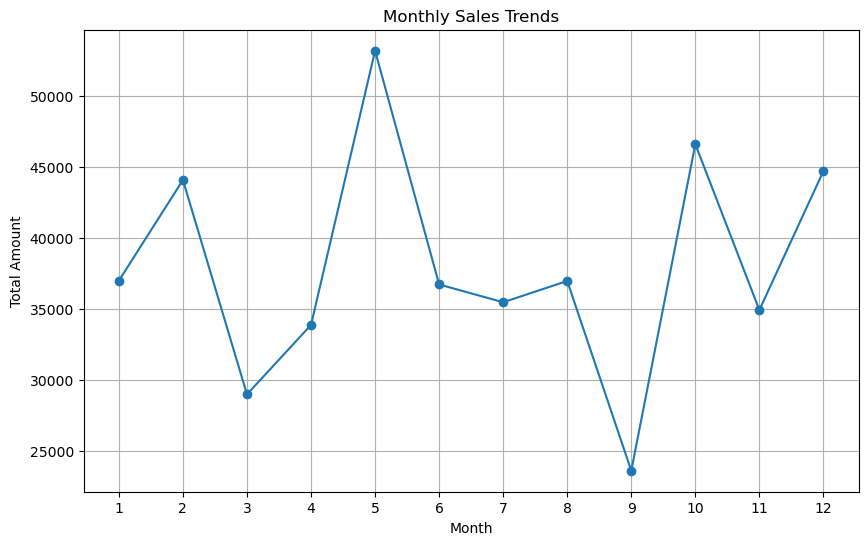

In [70]:
plt.figure(figsize=(10, 6))
monthly_sales.plot(marker='o', linestyle='-')
plt.title('Monthly Sales Trends')
plt.xlabel('Month')
plt.ylabel('Total Amount')
plt.xticks(range(1, 13))  # Ensure all months are displayed on the x-axis
plt.grid(True)
plt.show()

#  customer demographics and product analysis

In [35]:
# customer demographics and product analysis

In [25]:
customer_demographics = df.groupby('Gender').size()

In [27]:
print(customer_demographics)

Gender
Female    510
Male      490
dtype: int64


In [ ]:
product_analysis = df.groupby('Product Category').agg({'Quantity' : 'sum', 'Total Amount' : 'sum'})

In [28]:
print(product_analysis)

                  Quantity  Total Amount
Product Category                        
Beauty                 771        143515
Clothing               894        155580
Electronics            849        156905


# counting occurences of Gender

In [ ]:
#using pie chart to analyse the distribution of Gender

In [56]:
df['Gender'].value_counts()

Gender
Female    510
Male      490
Name: count, dtype: int64

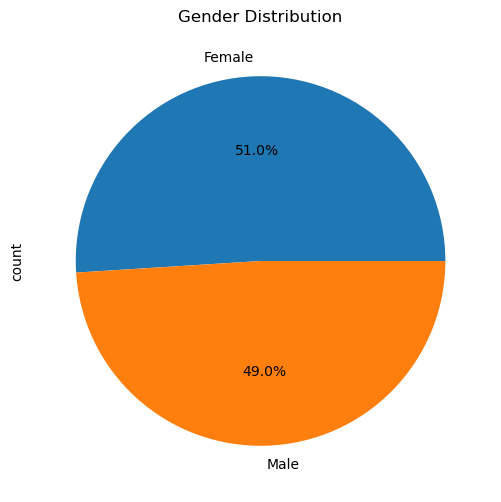

In [29]:
plt.figure(figsize=(8,6))
df['Gender'].value_counts().plot(kind='pie' , autopct = '%1.1f%%')
plt.title('Gender Distribution')
plt.show()

In [ ]:
# fender distribution

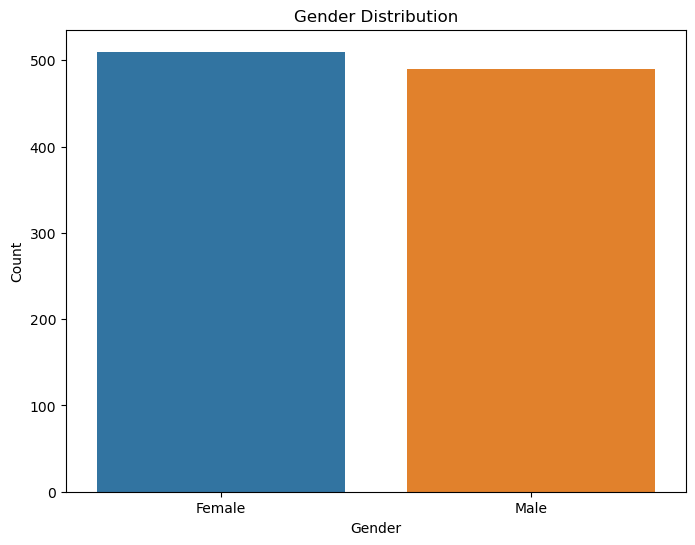

In [33]:
gender_counts = df['Gender'].value_counts()
plt.figure(figsize=(8, 6))
sns.barplot(x=gender_counts.index, y=gender_counts.values)
plt.title('Gender Distribution')
plt.xlabel('Gender')
plt.ylabel('Count')
plt.show()

In [ ]:
# age distribution

C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


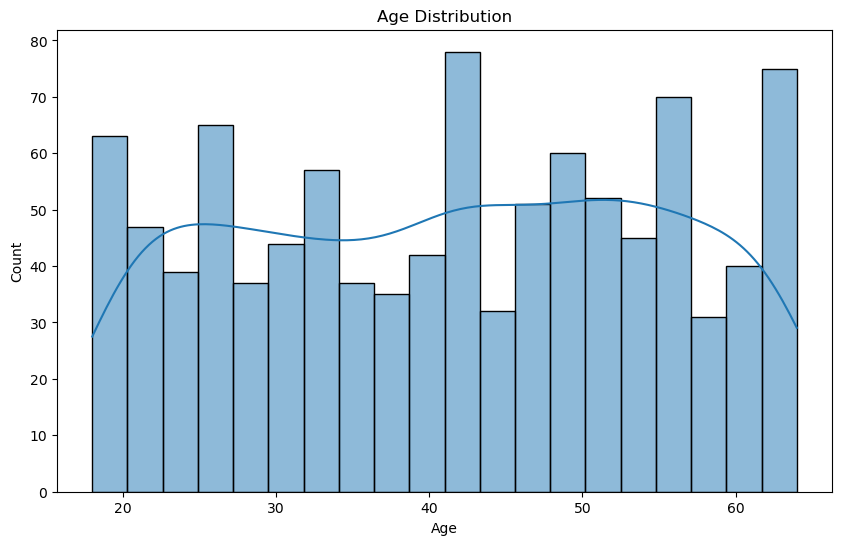

In [55]:
plt.figure(figsize=(10, 6))
sns.histplot(df['Age'], bins=20, kde=True)
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Count')
plt.show()

In [ ]:
# Defining age groups


In [57]:
bins = [0, 20, 30, 40, 50, 60, 70, 100]
labels = ['0-20', '21-30', '31-40', '41-50', '51-60', '61-70', '71-100']
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

In [ ]:
#  contingency table


In [58]:
contingency_table = pd.crosstab(df['Age Group'], df['Gender'])

In [ ]:
# Plot bar chart


<Figure size 1000x600 with 0 Axes>

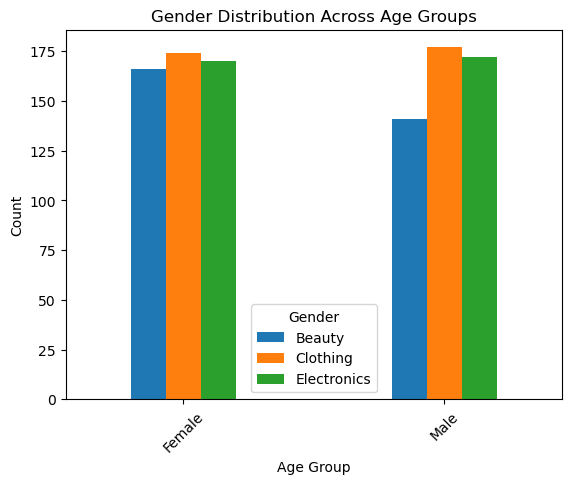

In [68]:
plt.figure(figsize=(10, 6))
contingency_table.plot(kind='bar', width=0.4)
plt.title('Gender Distribution Across Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.legend(title='Gender')
plt.show()

# Distribition of product category 

In [61]:
product_category_distribution = df['Product Category'].value_counts()


In [60]:
print(product_category_distribution)

Product Category
Clothing       351
Electronics    342
Beauty         307
Name: count, dtype: int64


# Distribition of product category by gender

In [ ]:
# Create a contingency table


In [62]:
contingency_table = pd.crosstab(df['Gender'], df['Product Category'])

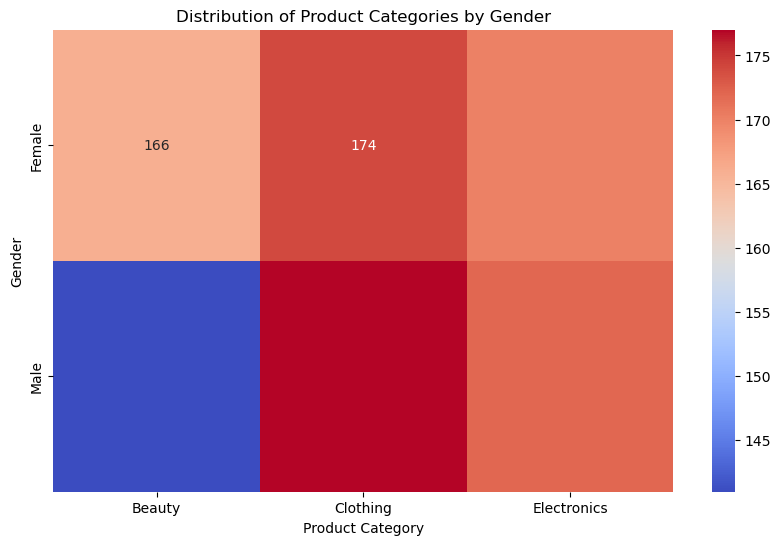

In [64]:
plt.figure(figsize=(10, 6))
sns.heatmap(contingency_table, annot=True, cmap='coolwarm', fmt='d')
plt.title('Distribution of Product Categories by Gender')
plt.xlabel('Product Category')
plt.ylabel('Gender')
plt.show()

# Purchasing Behavior Trends Over Time

C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\user\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


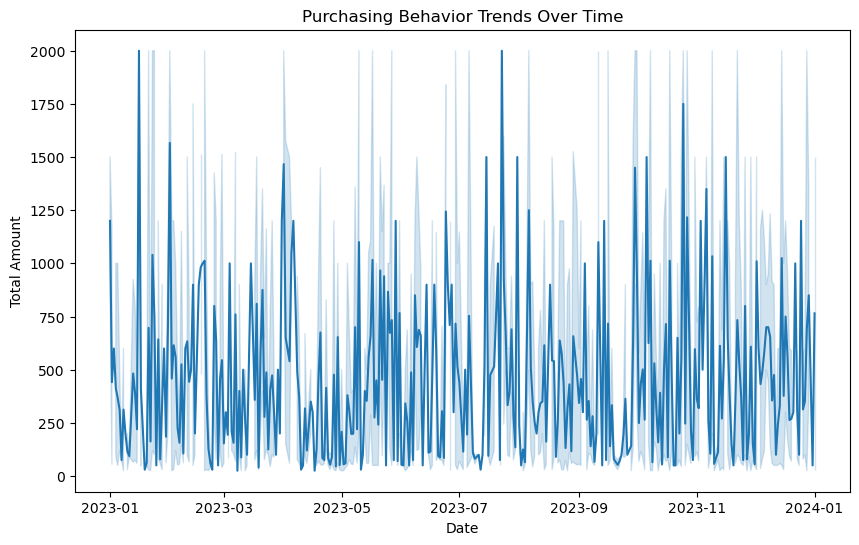

In [63]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Date', y='Total Amount', data=df)
plt.title('Purchasing Behavior Trends Over Time')
plt.xlabel('Date')
plt.ylabel('Total Amount')
plt.show()

In [ ]:
Based on the analysis provided, here are some actionable recommendations:

Targeted Marketing Campaigns:

Since Clothing has the highest count of purchases among all product categories, 
consider launching targeted marketing campaigns specifically tailored towards promoting clothing items. 
This could include offering special discounts, promotions, or exclusive deals to attract more customers.
Product Diversification:

Given that Electronics and Beauty products have relatively lower purchase counts compared to Clothing,
consider diversifying the product offerings within these categories. Introducing new and innovative products, 
collaborating with popular brands, or expanding the range of available options can help attract more customers 
    and increase sales in these categories.